# Pivot-taulukoita Pythonilla
https://pythonaki.wordpress.com/2018/05/10/pivot-taulukoita-pythonilla/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data=pd.read_excel('http://www.elisanet.fi/taanila/happy.xlsx')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015
1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015
2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015
3,Angola,Sub-Saharan Africa,137.0,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,2015
4,Argentina,Latin America and Caribbean,30.0,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,2015


In [2]:
#Pivot-taulukko, jonka arvoina (values) onnellisuuspisteiden kesiarvot ja riveillä (index) vuodet 
data.pivot_table(values = 'Happiness Score', index = 'Year')

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


In [3]:
#Onnellisuuspisteiden keskiarvot alueittain
data.pivot_table(values = 'Happiness Score', index = 'Region')

,Happiness Score
Region,
Australia and New Zealand,7.302500
Central and Eastern Europe,5.371184
Eastern Asia,5.632333
Latin America and Caribbean,6.069074
Middle East and Northern Africa,5.387879
North America,7.227167
Southeastern Asia,5.364077
Southern Asia,4.590857
Sub-Saharan Africa,4.150957


In [4]:
#Riveille voi ottaa useampiakin muuttujia
data.pivot_table(values = 'Happiness Score', index = ['Region', 'Year'])

Happiness Score
Region                          Year                 
Australia and New Zealand       2015         7.285000
                                2016         7.323500
                                2017         7.299000
Central and Eastern Europe      2015         5.332931
                                2016         5.370690
                                2017         5.409931
Eastern Asia                    2015         5.626167
                                2016         5.624167
                                2017         5.646667
Latin America and Caribbean     2015         6.144682
                                2016         6.101750
                                2017         5.957818
Middle East and Northern Africa 2015         5.406900
                                2016         5.386053
                                2017         5.369684
North America                   2015         7.273000
                                2016         7.254000
                                2017         7.154500
Southeastern Asia               2015         5.317444
                                2016         5.338889
                                2017         5.444875
Southern Asia                   2015         4.580857
                                2016         4.563286
                                2017         4.628429
Sub-Saharan Africa              2015         4.202800
                                2016         4.136421
                                2017         4.111949
Western Europe                  2015         6.689619
                                2016         6.685667
                                2017         6.703714

In [5]:
#Edellinen mahtuu pienempään tilaan, jos otan vuodet sarakkeisiin (columns). Lasken myös kaikkien (All) keskiarvot
data.pivot_table(values = 'Happiness Score', index= 'Region', columns='Year', margins = True)

Year,2015,2016,2017,All
Region,,,,
Australia and New Zealand,7.285000,7.323500,7.299000,7.302500
Central and Eastern Europe,5.332931,5.370690,5.409931,5.371184
Eastern Asia,5.626167,5.624167,5.646667,5.632333
Latin America and Caribbean,6.144682,6.101750,5.957818,6.069074
Middle East and Northern Africa,5.406900,5.386053,5.369684,5.387879
North America,7.273000,7.254000,7.154500,7.227167
Southeastern Asia,5.317444,5.338889,5.444875,5.364077
Southern Asia,4.580857,4.563286,4.628429,4.590857
Sub-Saharan Africa,4.202800,4.136421,4.111949,4.150957


In [6]:
data.pivot_table(values = ['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)'], index = 'Region', 
                           columns = 'Year', margins = 'True')                 

Economy (GDP per Capita)                      \
Year                                                2015      2016      2017   
Region                                                                         
Australia and New Zealand                       1.291880  1.402545  1.445060   
Central and Eastern Europe                      0.942438  1.047537  1.092051   
Eastern Asia                                    1.151780  1.277312  1.318716   
Latin America and Caribbean                     0.876815  0.993410  1.006981   
Middle East and Northern Africa                 1.066973  1.139323  1.168535   
North America                                   1.360400  1.474055  1.512732   
Southeastern Asia                               0.789054  0.896381  0.965253   
Southern Asia                                   0.560486  0.660671  0.697479   
Sub-Saharan Africa                              0.380473  0.474321  0.501749   
Western Europe                                  1.298596  1.417056  1.457411   
All                                             0.846137  0.953880  0.984718   

                                          Happiness Score                      \
Year                                  All            2015      2016      2017   
Region                                                                          
Australia and New Zealand        1.379828        7.285000  7.323500  7.299000   
Central and Eastern Europe       1.027342        5.332931  5.370690  5.409931   
Eastern Asia                     1.249269        5.626167  5.624167  5.646667   
Latin America and Caribbean      0.960079        6.144682  6.101750  5.957818   
Middle East and Northern Africa  1.123945        5.406900  5.386053  5.369684   
North America                    1.449062        7.273000  7.254000  7.154500   
Southeastern Asia                0.880421        5.317444  5.338889  5.444875   
Southern Asia                    0.639545        4.580857  4.563286  4.628429   
Sub-Saharan Africa               0.451379        4.202800  4.136421  4.111949   
Western Europe                   1.391021        6.689619  6.685667  6.703714   
All                              0.927830        5.375734  5.382185  5.354019   

                                          Health (Life Expectancy)            \
Year                                  All                     2015      2016   
Region                                                                         
Australia and New Zealand        7.302500                 0.919965  0.841080   
Central and Eastern Europe       5.371184                 0.718774  0.631592   
Eastern Asia                     5.632333                 0.877388  0.806680   
Latin America and Caribbean      6.069074                 0.703870  0.612702   
Middle East and Northern Africa  5.387879                 0.705616  0.616438   
North America                    7.227167                 0.883710  0.803300   
Southeastern Asia                5.364077                 0.677357  0.561369   
Southern Asia                    4.590857                 0.540830  0.453670   
Sub-Saharan Africa               4.150957                 0.282332  0.239872   
Western Europe                   6.693000                 0.909148  0.825754   
All                              5.370728                 0.630259  0.557619   

                                                     
Year                                 2017       All  
Region                                               
Australia and New Zealand        0.830323  0.863789  
Central and Eastern Europe       0.636090  0.662152  
Eastern Asia                     0.808323  0.830797  
Latin America and Caribbean      0.611009  0.641650  
Middle East and Northern Africa  0.605980  0.643763  
North America                    0.804422  0.830477  
Southeastern Asia                0.581918  0.607841  
Southern Asia                    0.456658  0.483719  
Sub-Saharan Africa               0.224766  0.249353  
Western

In [7]:
#aggfunc määrittää laskettavat tunnusluvut; tässä keskiarvo, mediaani, pienin, suurin ja keskihajonta
data.pivot_table(values = 'Happiness Score', index = 'Region', aggfunc = [np.mean, np.median, min, max, np.std])


,mean,median,min,max,std
,Happiness Score,Happiness Score,Happiness Score,Happiness Score,Happiness Score
Region,,,,,
Australia and New Zealand,7.302500,7.2995,7.284,7.334,0.020936
Central and Eastern Europe,5.371184,5.4010,4.096,6.609,0.578274
Eastern Asia,5.632333,5.6545,4.874,6.422,0.502100
Latin America and Caribbean,6.069074,6.1265,3.603,7.226,0.728157
Middle East and Northern Africa,5.387879,5.3175,3.006,7.278,1.031656
North America,7.227167,7.2175,6.993,7.427,0.179331
Southeastern Asia,5.364077,5.2965,3.819,6.798,0.882637
Southern Asia,4.590857,4.6080,3.360,5.269,0.535978


In [8]:
#Jaetaan onnellisuuspisteet neljänneksiin
score1 = pd.qcut(data['Happiness Score'], 4)
#Lasketaan eri neljänneksissä olevien maiden lukumäärät. fill_value korvaa Nan-merkinnät nollilla
data.pivot_table(values = 'Happiness Score', index = 'Region', columns=score1, aggfunc= len, fill_value = 0)

Happiness Score,"(2.692, 4.509]","(4.509, 5.282]","(5.282, 6.234]","(6.234, 7.587]"
Region,,,,
Australia and New Zealand,0,0,0,6
Central and Eastern Europe,10,28,46,3
Eastern Asia,0,6,9,3
Latin America and Caribbean,2,8,28,30
Middle East and Northern Africa,9,19,14,16
North America,0,0,0,6
Southeastern Asia,5,8,7,6
Southern Asia,8,13,0,0
Sub-Saharan Africa,84,29,4,0


Text(0.5,0,'Happiness Score Mean')

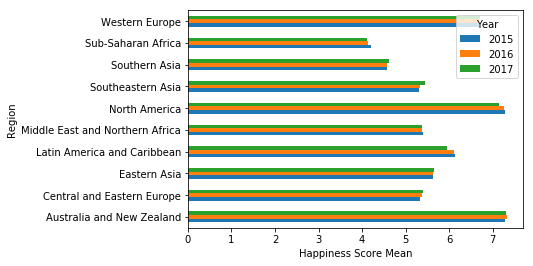

In [9]:
#Kuvataan pivot-taulukko vaakapylväinä (barh())
data.pivot_table(values = 'Happiness Score', index = 'Region', columns = 'Year').plot.barh()
plt.xlabel('Happiness Score Mean')

Text(0.5,0,'Happiness Score Mean 2017')

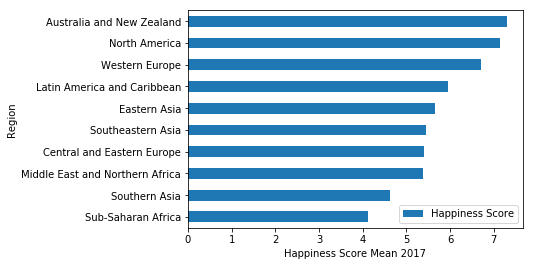

In [10]:
#Vain vuosi 2017 ja alueet keskiarvon mukaan järjestettynä
data[data['Year'] == 2017].pivot_table(values = 'Happiness Score', index = 'Region').sort_values('Happiness Score').plot.barh()
plt.xlabel('Happiness Score Mean 2017')